# Assignment 3 




Due by 11:59pm, Apr. 23, 2023

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. Suppose I is 5X5 image, K is a filter. Compute the convolution of the image I with K, stride =1.

I:

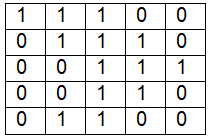

K:

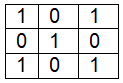

a)With zero padding.

b)Without padding.






**Answer:**

***
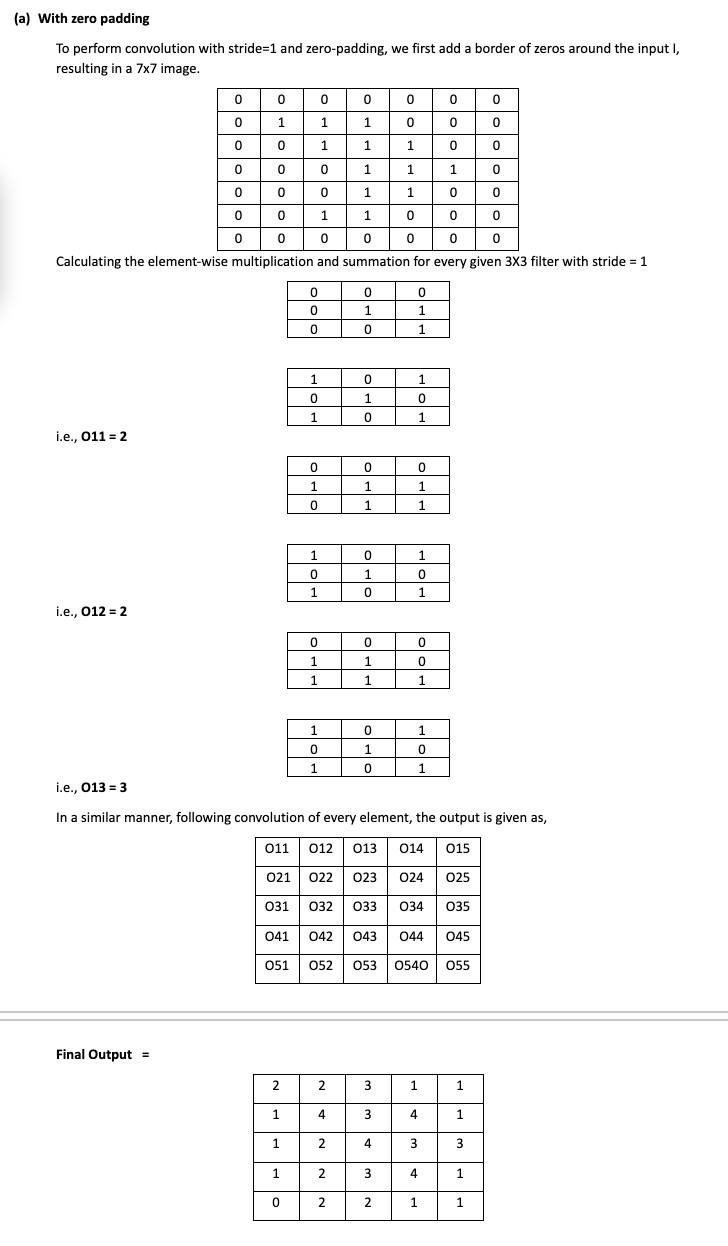

***
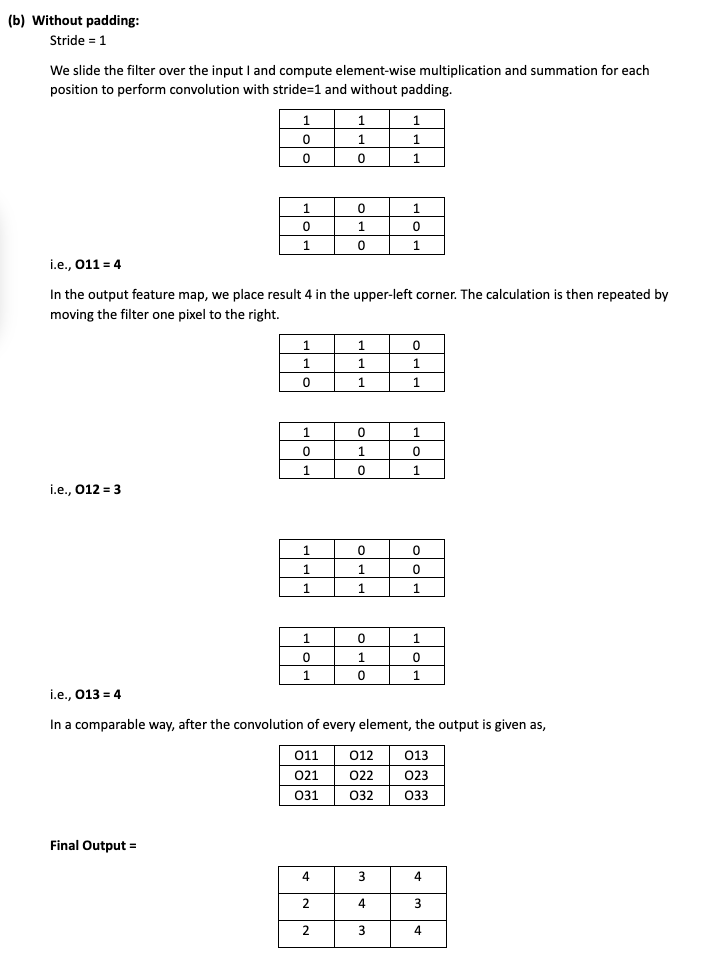

2.Let I be the input. Write the output using max pooling with 2X2 filter, stride = 2.

I:
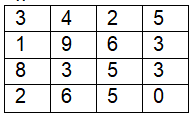



**Answer:**

***
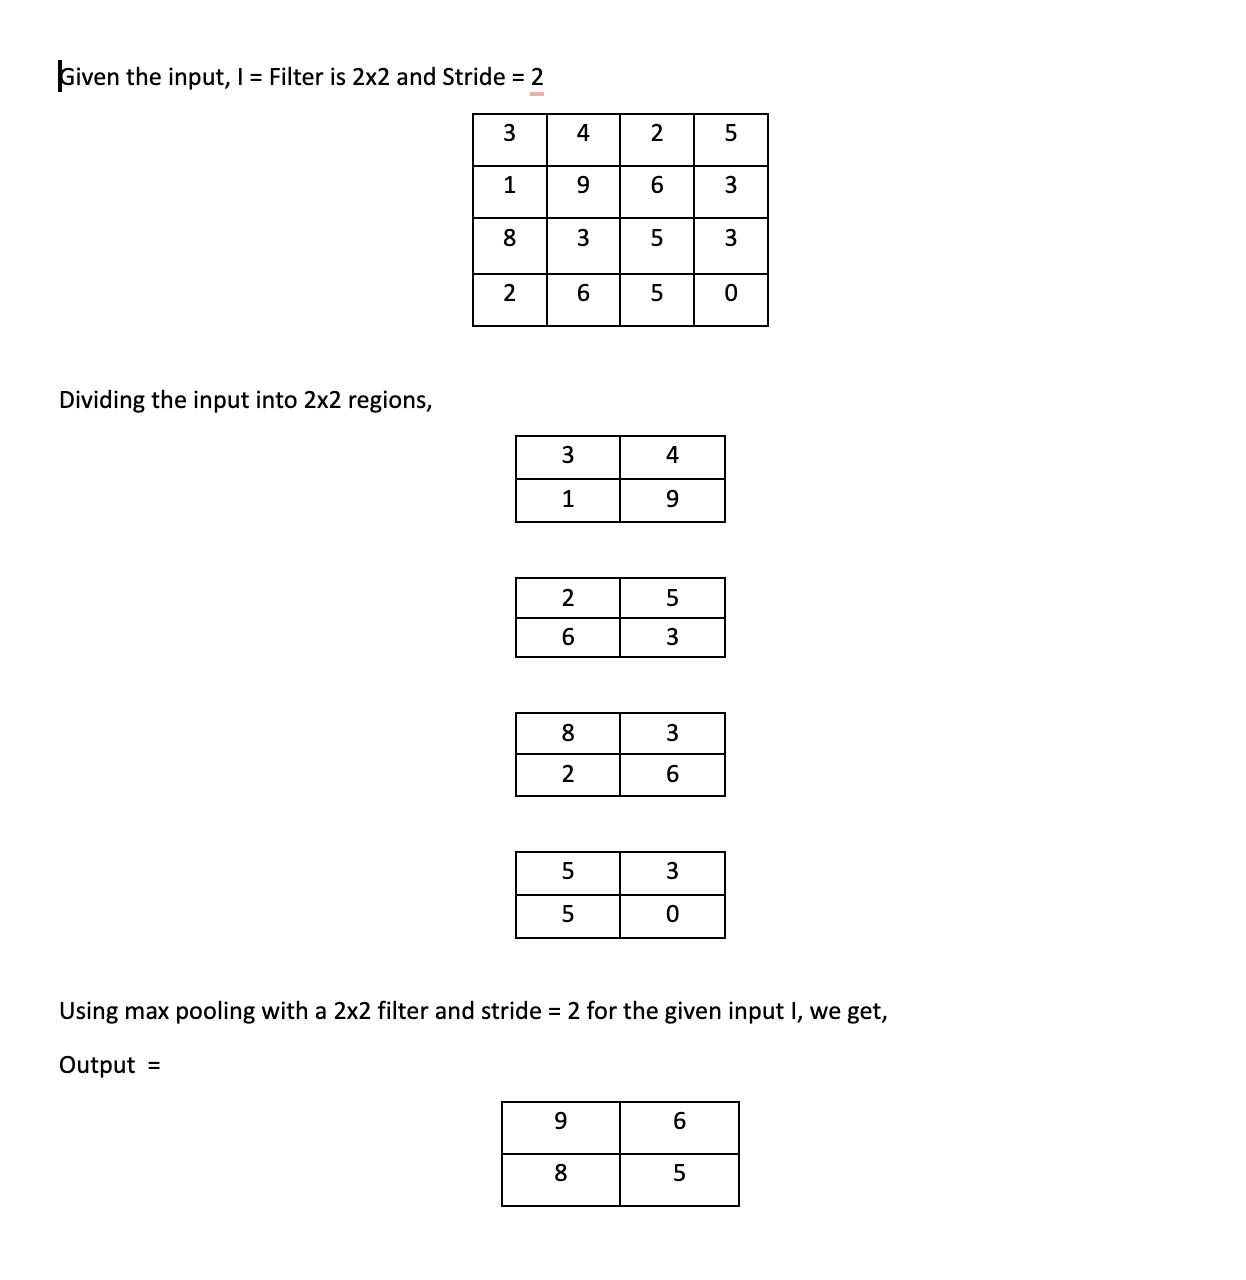


3.Let I be the 5X5 RGB image. K is a 3X3 filter having all 1s. 

For the R channel, we have,
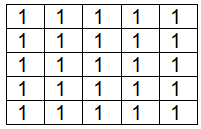

For the G channel, we have,
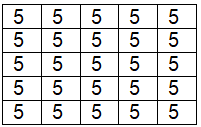

For the B channel, we have,
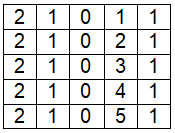

Compute the convolution of I with K, stride = 1, without padding.




**Answer:**

***
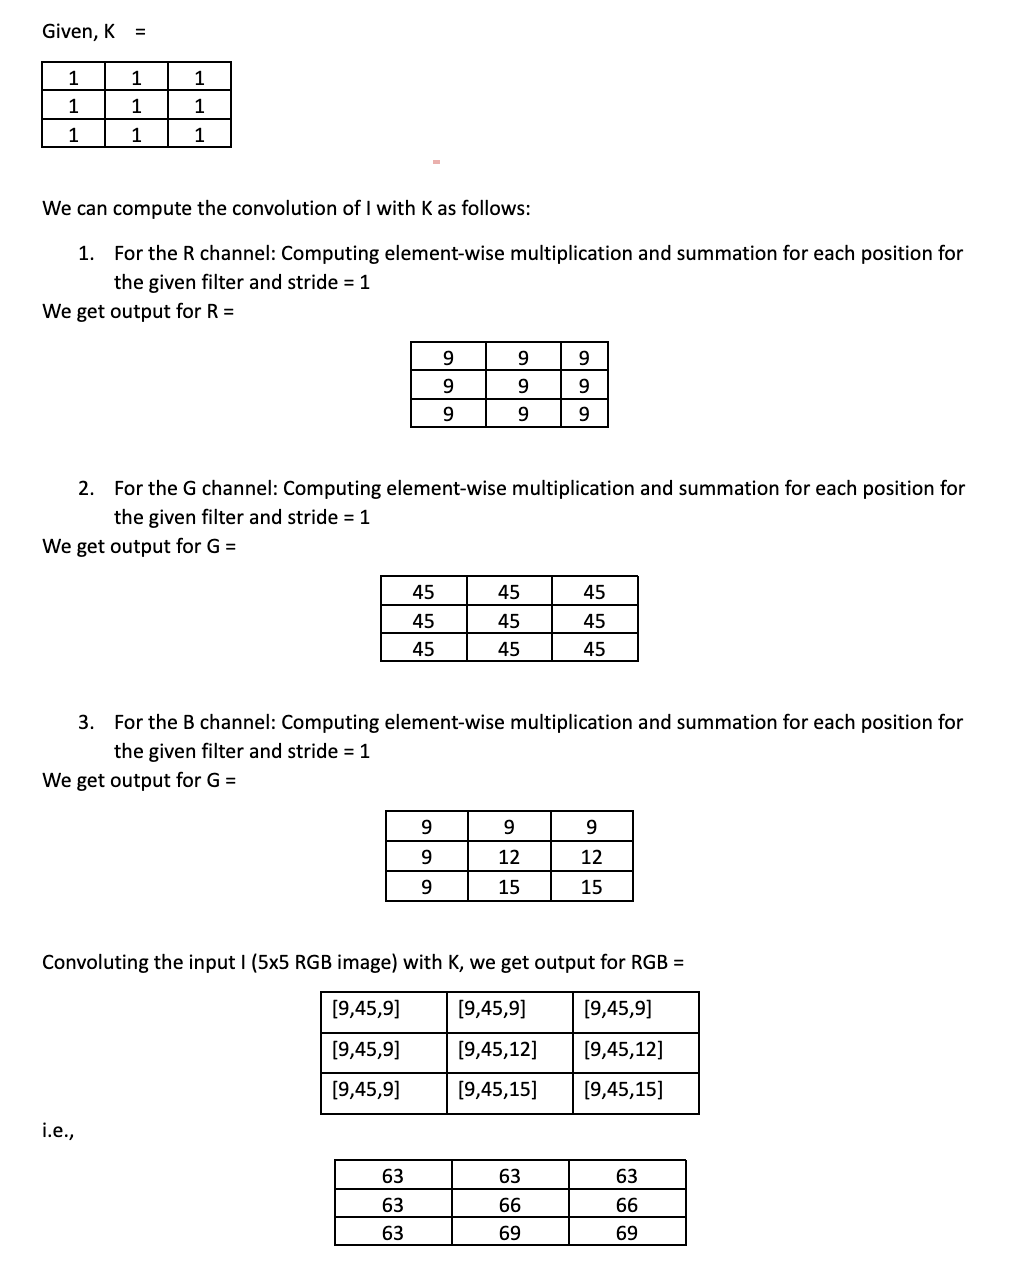

## Programming Questions (Question 4: 50 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

(1) Build the sequential classification with several dense layers. Don’t use convolution layers. 

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

(2)Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy. Compare to the previous result.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the data into training, validation, and testing sets
x_train, x_val = x_train[:-5000], x_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# Convert the labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the Sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the Sequential model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import matplotlib.pyplot as plt

# Train the Sequential model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 15s 6ms/step - loss: 0.2571 - accuracy: 0.9244 - val_loss: 0.1104 - val_accuracy: 0.9672
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0884 - val_accuracy: 0.9752
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0890 - val_accuracy: 0.9748
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0550 - accuracy: 0.9823 - val_loss: 0.0776 - val_accuracy: 0.9788
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0776 - val_accuracy: 0.9796
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0776 - val_accuracy: 0.9816
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0824 - val_accuracy

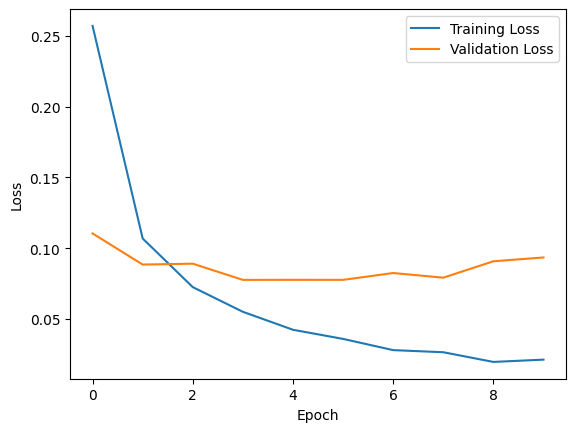

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

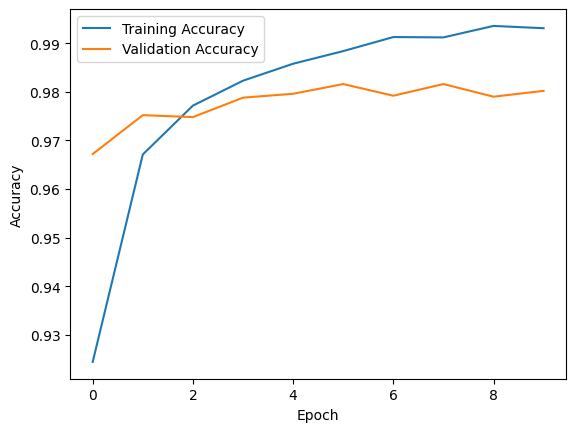

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the Sequential model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split the data into training, validation and testing set
x_train, x_val = x_train[:-5000], x_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# Reshape the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))



In [ ]:
# Build the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
   


In [ ]:
# Compile the CNN model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1719/1719 [==============================] - 14s 5ms/step - loss: 0.1363 - accuracy: 0.9574 - val_loss: 0.0464 - val_accuracy: 0.9866
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0326 - val_accuracy: 0.9914
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0470 - val_accuracy: 0.9876
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0469 - val_accuracy: 0.9910
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0510 - val_accuracy: 0.9878
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0449 - val_accuracy: 0.9902
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0404 - val_accuracy

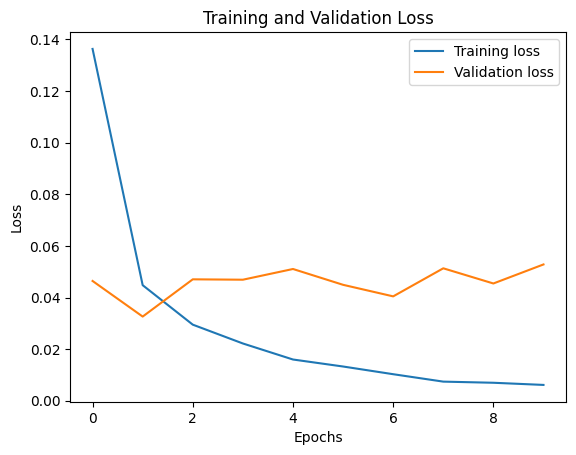

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


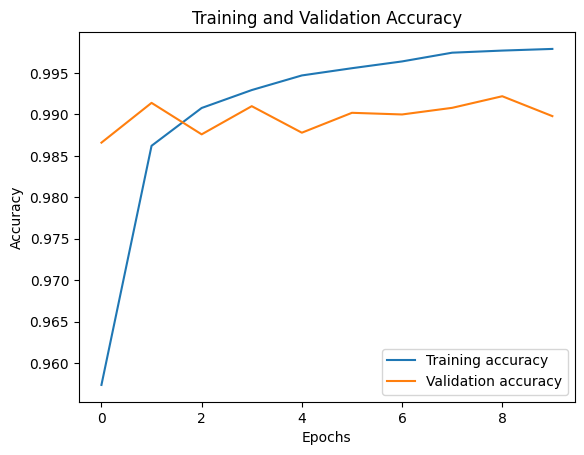

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the CNN model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the testing accuracy
print('Testing accuracy:', test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9900
Testing accuracy: 0.9900000095367432


So, in this particular situation, the CNN model managed to achieve an accuracy of 99% during testing, while a sequential model that had multiple dense layers got 97%. That clearly shows that the CNN model is more capable of identifying the features and patterns in the images, and that's why it produced better results.

Still, we must remember that the design and hyperparameters of each model can play a significant role in how well they perform. So, it's crucial to keep in mind that this comparison is only valid if both models were optimized correctly.

5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Build the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the testing accuracy
print('Testing accuracy:', test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4593 - accuracy: 0.4726 - val_loss: 1.1706 - val_accuracy: 0.5946
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0990 - accuracy: 0.6158 - val_loss: 1.0504 - val_accuracy: 0.6388
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9614 - accuracy: 0.6638 - val_loss: 0.9734 - val_accuracy: 0.6628
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8635 - accuracy: 0.7016 - val_loss: 0.9609 - val_accuracy: 0.6682
Epoch 5/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.7845 - accuracy: 0.7277 - val_loss: 0.8917 - val_accuracy: 0.6982
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7140 - accuracy: 0.7524 - val_loss: 0.8984 - val_accuracy: 0.6948
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6495 - accuracy: 0.7725 - val_loss: 0.9319 - val_accuracy:

If we want to tune the hyperparameters to get a better accuracy, we can try changing the number of filters, kernel size, and pooling size in the convolution layers, and the number of units in the dense layers. We can also try adding more convolution layers and using different activation functions. Below we have done the tuning to improve the accuracy.

In [ ]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.1)

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the accuracy
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/25
704/704 [==============================] - 14s 14ms/step - loss: 2.2388 - accuracy: 0.2444 - val_loss: 1.7395 - val_accuracy: 0.3684
Epoch 2/25
704/704 [==============================] - 9s 12ms/step - loss: 1.7502 - accuracy: 0.3552 - val_loss: 1.5358 - val_accuracy: 0.4466
Epoch 3/25
704/704 [==============================] - 9s 13ms/step - loss: 1.5802 - accuracy: 0.4215 - val_loss: 1.4079 - val_accuracy: 0.5048
Epoch 4/25
704/704 [==============================] - 9s 13ms/step - loss: 1.4603 - accuracy: 0.4721 - val_loss: 1.4120 - val_accuracy: 0.5116
Epoch 5/25
704/704 [==============================] - 9s 13ms/step - loss: 1.3649 - accuracy: 0.5101 - val_loss: 1.2594 - val_accuracy: 0.5520
Epoch 6/25
704/704 [==============================] - 9s 13ms/step - loss: 1.2719 - accuracy: 0.5460 - val_loss: 1.1323 - val_accuracy: 0.5978
Epoch 7/25
704/704 [==============================] - 9s 13ms/step - loss: 1.1942 - accuracy: 0.5753 - val_loss: 1.0476 - val_accuracy: 0.635